# Problem1 (40 points)
## Finding Puangs

1. Please use the data “p1data.npy” that contain 10,000 images 
    (32pixels X 32 pixels color)  
2. First you randomize your image data. Then, find ALL images of PUANGs.  
    (1) Provide your random seed number (Use p1_3_shuffle_puang.py file)  
    (2) Provide images and the locations of those images. Indices  
    (3) In the “p1_3_shuffle_puang.py” file, you can set pseudo-random number with your ID.    
      
3. Describe how you find those images and what method of Deep Learning is used.
4. Please provide your codes as dot py format and images.

### Data load

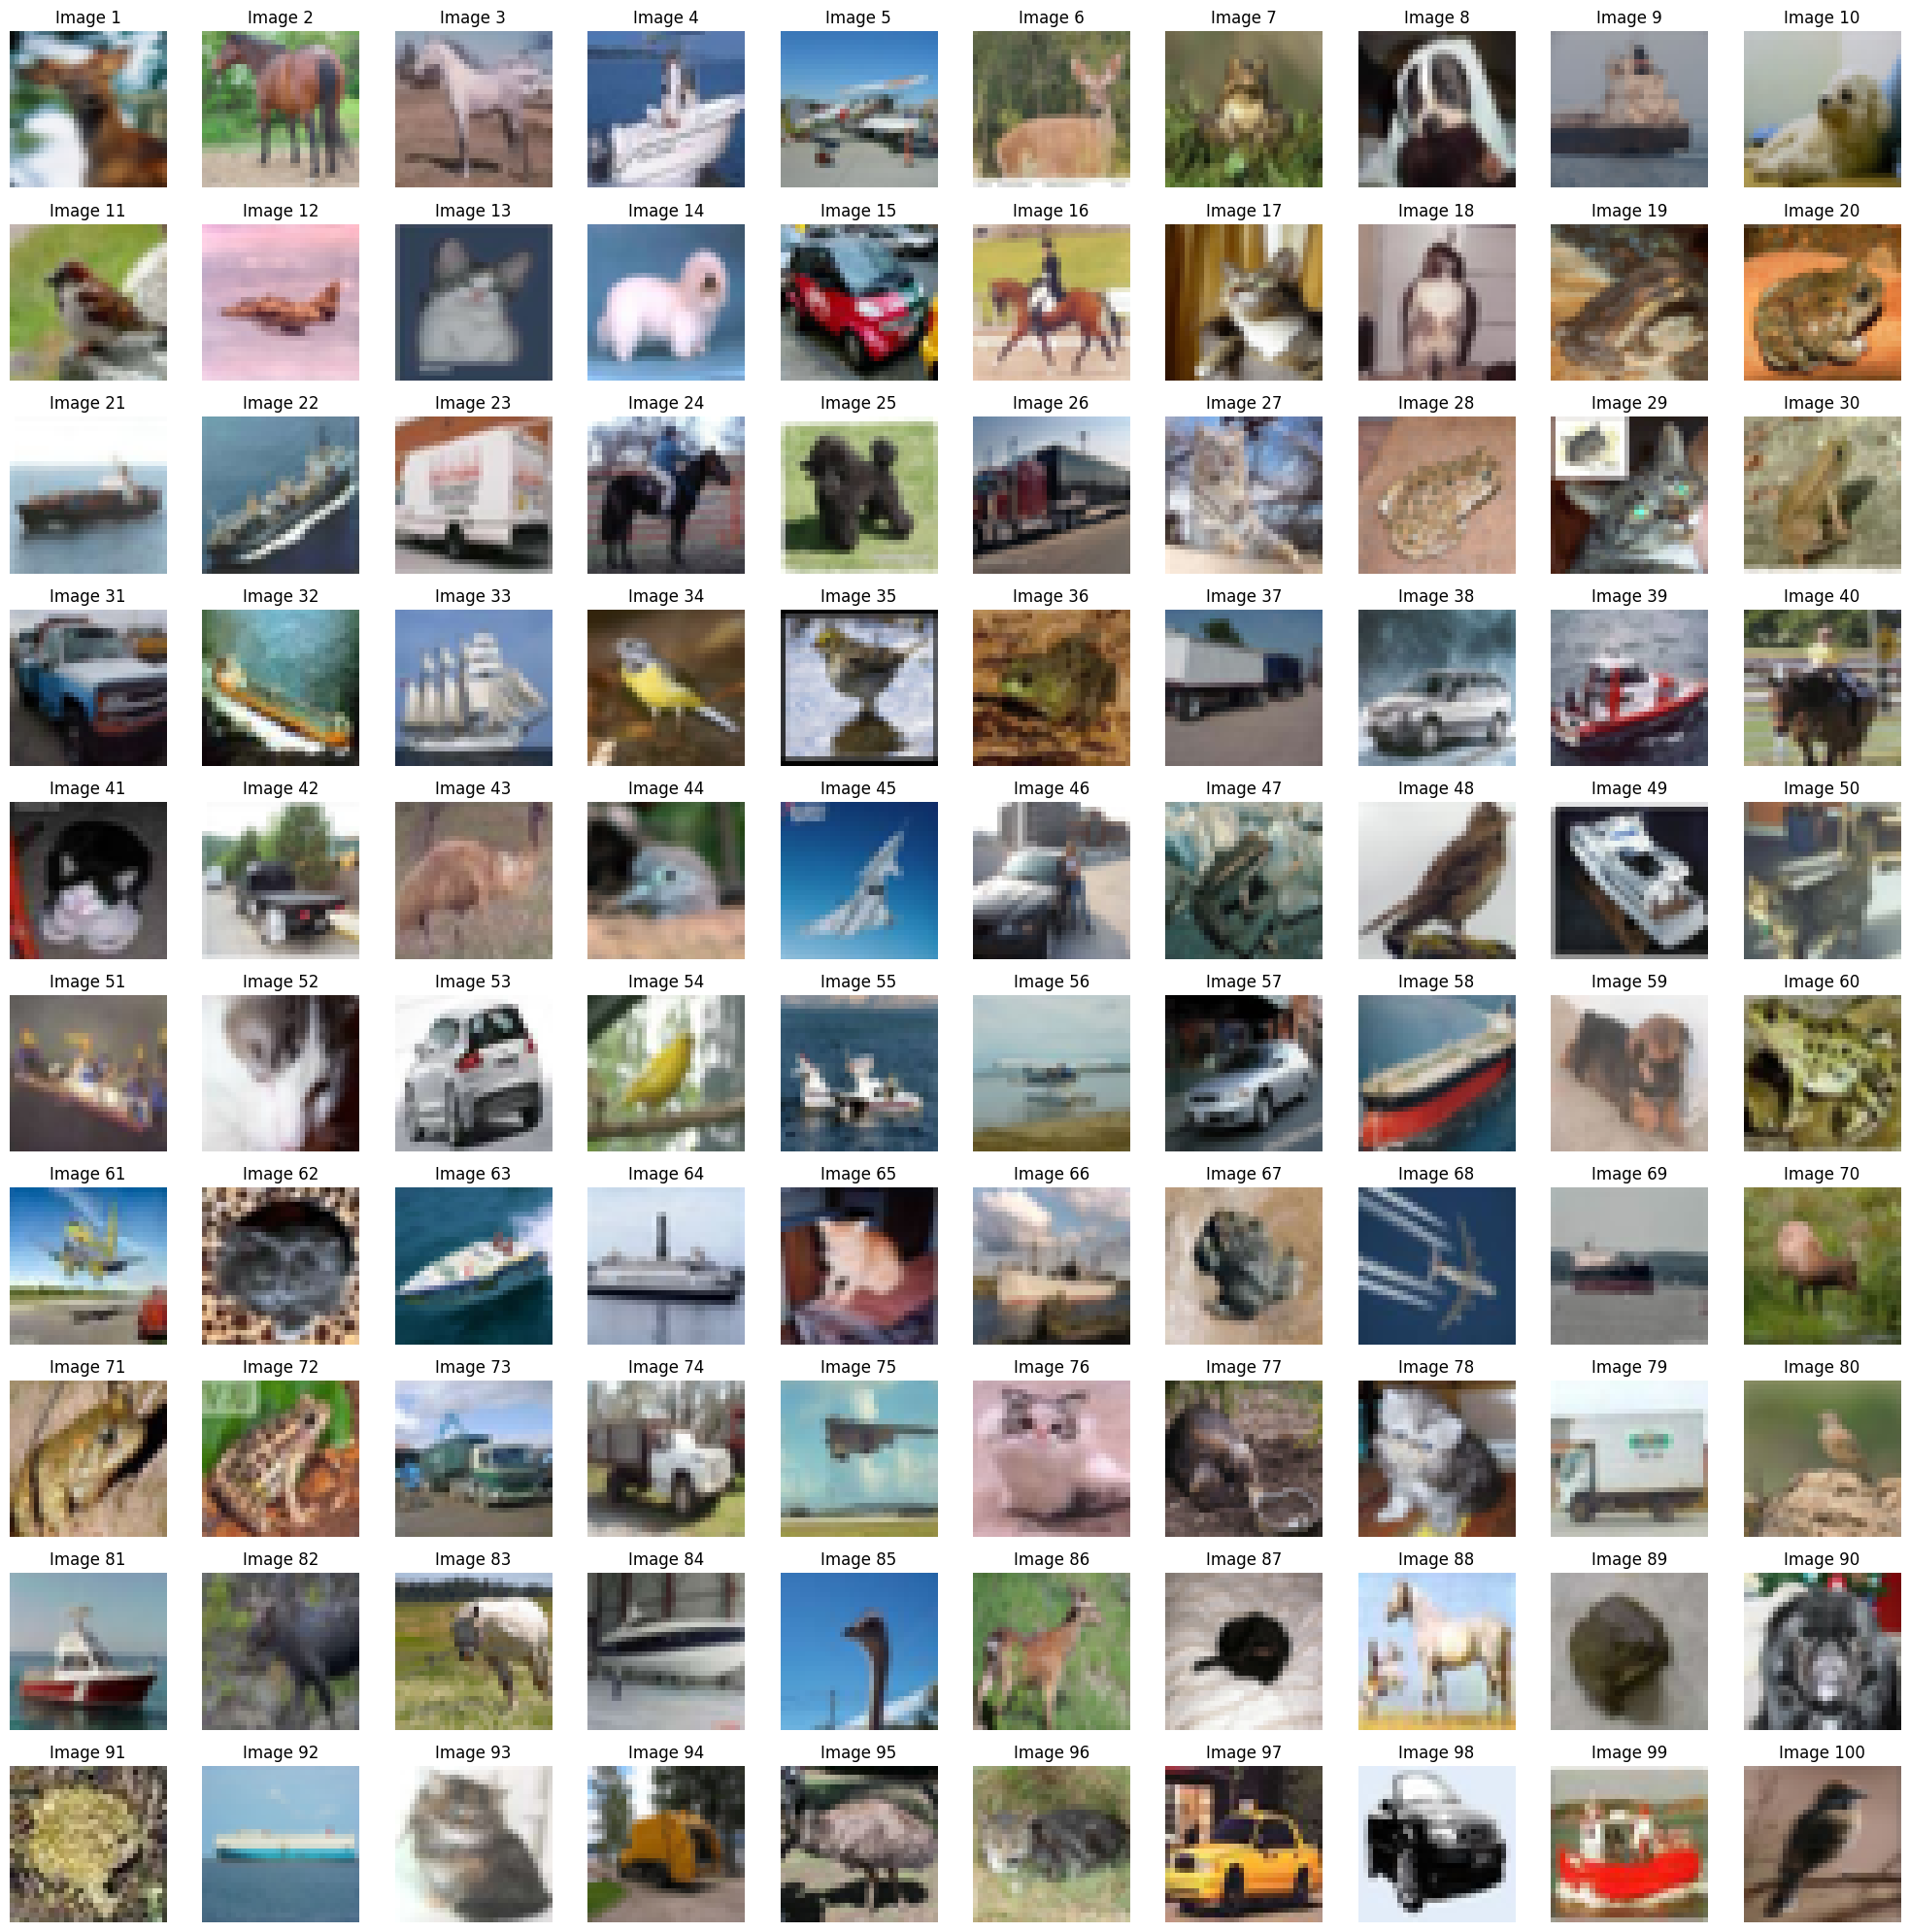

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# npy file load 
path = r"C:\github\Data\final_files\p1data.npy"
data = np.load(path)

# input image number
num_images = int(input("출력할 이미지의 수를 입력하세요: "))

images_per_row = 10

num_rows = (num_images + images_per_row - 1) // images_per_row
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row * 2, num_rows * 2))


axes = axes.reshape(-1, images_per_row)

# print image
for i in range(num_images):
    row = i // images_per_row
    col = i % images_per_row
    axes[row][col].imshow(data[i])
    axes[row][col].axis('off')  
    axes[row][col].set_title(f'Image {i+1}')

for j in range(num_images, num_rows * images_per_row):
    row = j // images_per_row
    col = j % images_per_row
    axes[row][col].axis('off')  

plt.tight_layout()
plt.show()


### Test Codes

In [9]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os

# 사용자 ID 설정 (여기에 본인의 ID를 입력하세요)
yourid = 20224531  # 예시 ID, 본인의 ID로 변경하세요

# 데이터 파일 로드
path = r"C:\github\Data\final_files\p1data.npy"
with open(path, 'rb') as infile:
    images = np.load(infile)  # 이미지는 32x32x3 형태
    labels = np.load(infile)  # 라벨은 0 또는 1 (0: 비 푸앙, 1: 푸앙)

# 데이터 섞기
images, labels = shuffle(images, labels, random_state=yourid)

# 훈련 및 검증 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=yourid)

# 라벨을 원-핫 인코딩으로 변환
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# 모델 설계
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 모델 저장
model_path = 'puang_model.h5'
model.save(model_path)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'테스트 정확도: {test_acc}')

# 푸앙 이미지 찾기
puang_indices = []
puang_images = []

predictions = model.predict(images)
for idx, prediction in enumerate(predictions):
    if np.argmax(prediction) == 1:  # 모델이 푸앙을 식별하는 인덱스가 1이라고 가정
        puang_indices.append(idx)
        puang_images.append(images[idx])

# 결과 저장
output_dir = 'puang_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, img in enumerate(puang_images):
    plt.imsave(os.path.join(output_dir, f'puang_{puang_indices[i]}.png'), img)

# 결과 출력
print(f"랜덤 시드: {yourid}")
print(f"총 {len(puang_indices)}개의 푸앙 이미지를 찾았습니다.")
print("푸앙 이미지의 인덱스는 다음과 같습니다:")
print(puang_indices)

# 시각화 (한 줄에 최대 10개씩)
images_per_row = 10
num_images = len(puang_images)
num_rows = (num_images + images_per_row - 1) // images_per_row

fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row * 2, num_rows * 2))

# 빈 축 숨기기 위해 2차원 배열로 변환
axes = axes.reshape(-1, images_per_row) if num_images > 1 else [axes]

for i in range(num_images):
    row = i // images_per_row
    col = i % images_per_row
    axes[row][col].imshow(puang_images[i])
    axes[row][col].axis('off')
    axes[row][col].set_title(f'Idx {puang_indices[i]}')

# 빈 칸 축 숨기기
for j in range(num_images, num_rows * images_per_row):
    row = j // images_per_row
    col = j % images_per_row
    axes[row][col].axis('off')

plt.tight_layout()
plt.show()


IndexError: index 7 is out of bounds for axis 1 with size 2

In [10]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os

# 사용자 ID 설정 (여기에 본인의 ID를 입력하세요)
yourid = 20224531  # 예시 ID, 본인의 ID로 변경하세요

# 데이터 파일 경로 설정
path = r"C:\github\Data\final_files\p1data.npy"

# 데이터 파일 로드
with open(path, 'rb') as infile:
    images = np.load(infile)  # 이미지는 32x32x3 형태
    labels = np.load(infile)  # 라벨은 0 또는 1 (0: 비 푸앙, 1: 푸앙)

# 데이터 섞기
images, labels = shuffle(images, labels, random_state=yourid)

# 라벨 값 확인
unique_labels = np.unique(labels)
print(f"라벨 값: {unique_labels}")

# 훈련 및 검증 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=yourid)

# 클래스 수 확인
num_classes = len(unique_labels)
print(f"클래스 수: {num_classes}")

# 라벨을 원-핫 인코딩으로 변환
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# 모델 설계
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 출력층 수정
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 모델 저장
model_path = 'puang_model.h5'
model.save(model_path)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'테스트 정확도: {test_acc}')

# 푸앙 이미지 찾기
puang_indices = []
puang_images = []

predictions = model.predict(images)
for idx, prediction in enumerate(predictions):
    if np.argmax(prediction) == 1:  # 모델이 푸앙을 식별하는 인덱스가 1이라고 가정
        puang_indices.append(idx)
        puang_images.append(images[idx])

# 결과 저장
output_dir = 'puang_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, img in enumerate(puang_images):
    plt.imsave(os.path.join(output_dir, f'puang_{puang_indices[i]}.png'), img)

# 결과 출력
print(f"랜덤 시드: {yourid}")
print(f"총 {len(puang_indices)}개의 푸앙 이미지를 찾았습니다.")
print("푸앙 이미지의 인덱스는 다음과 같습니다:")
print(puang_indices)

# 시각화 (한 줄에 최대 10개씩)
images_per_row = 10
num_images = len(puang_images)
num_rows = (num_images + images_per_row - 1) // images_per_row

fig, axes = plt.subplots(num_rows, images_per_row, figsize=(images_per_row * 2, num_rows * 2))

# 빈 축 숨기기 위해 2차원 배열로 변환
axes = axes.reshape(-1, images_per_row) if num_images > 1 else [axes]

for i in range(num_images):
    row = i // images_per_row
    col = i % images_per_row
    axes[row][col].imshow(puang_images[i])
    axes[row][col].axis('off')
    axes[row][col].set_title(f'Idx {puang_indices[i]}')

# 빈 칸 축 숨기기
for j in range(num_images, num_rows * images_per_row):
    row = j // images_per_row
    col = j % images_per_row
    axes[row][col].axis('off')

plt.tight_layout()
plt.show()


라벨 값: [0 1 2 3 4 5 6 7 8 9]
클래스 수: 10
Epoch 1/10
250/250 [==============================] - 6s 21ms/step - loss: 4.2249 - accuracy: 0.1035 - val_loss: 2.3036 - val_accuracy: 0.0925
Epoch 2/10
250/250 [==============================] - 4s 18ms/step - loss: 2.3035 - accuracy: 0.1016 - val_loss: 2.3035 - val_accuracy: 0.0930
Epoch 3/10
250/250 [==============================] - 4s 18ms/step - loss: 2.3034 - accuracy: 0.1001 - val_loss: 2.3039 - val_accuracy: 0.0860
Epoch 4/10
250/250 [==============================] - 4s 17ms/step - loss: 2.3029 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.0860
Epoch 5/10
250/250 [==============================] - 4s 18ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3037 - val_accuracy: 0.0860
Epoch 6/10
250/250 [==============================] - 4s 18ms/step - loss: 2.3026 - accuracy: 0.1020 - val_loss: 2.3038 - val_accuracy: 0.0865
Epoch 7/10
250/250 [==============================] - 5s 19ms/step - loss: 2.3027 - accuracy: 0.1023 - v

ValueError: Number of rows must be a positive integer, not 0

<Figure size 2000x0 with 0 Axes>

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the dataset
path = r"C:\github\Data\final_files\p1data.npy"
with open(path, 'rb') as infile:
    images = np.load(infile)

# Assuming labels are randomly generated for demonstration purposes
# Replace this with actual labels if available
num_images = images.shape[0]
num_classes = 2  # Assuming binary classification (PUANG or not PUANG)
labels = np.random.randint(0, num_classes, num_images)

# Normalize the images
images = images / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Save the model
model.save('puang_model.h5')


Epoch 1/10
125/125 [==============================] - 5s 32ms/step - loss: 0.6945 - accuracy: 0.4942 - val_loss: 0.6933 - val_accuracy: 0.4955
Epoch 2/10
125/125 [==============================] - 4s 31ms/step - loss: 0.6934 - accuracy: 0.4976 - val_loss: 0.6933 - val_accuracy: 0.4955
Epoch 3/10
125/125 [==============================] - 7s 58ms/step - loss: 0.6935 - accuracy: 0.4974 - val_loss: 0.6933 - val_accuracy: 0.4955
Epoch 4/10
125/125 [==============================] - 6s 47ms/step - loss: 0.6934 - accuracy: 0.4925 - val_loss: 0.6932 - val_accuracy: 0.4955
Epoch 5/10
125/125 [==============================] - 6s 49ms/step - loss: 0.6933 - accuracy: 0.4906 - val_loss: 0.6931 - val_accuracy: 0.5220
Epoch 6/10
125/125 [==============================] - 6s 48ms/step - loss: 0.6933 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.4955
Epoch 7/10
125/125 [==============================] - 5s 42ms/step - loss: 0.6933 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.4970

In [21]:
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

# Set your ID for the random seed
yourid = 20224531

# Load the dataset
path = r"C:\github\Data\final_files\p1data.npy"
with open(path, 'rb') as infile:
    test_images = np.load(infile)

# Shuffle the dataset
test_images = shuffle(test_images, random_state=yourid)

# Ensure the model file exists
model_path = 'C:\github\Assignment_archive\전산물리학\Final_exam\puang_model.h5'
if not os.path.isfile(model_path):
    raise FileNotFoundError(f"The model file {model_path} does not exist.")

# Load the pre-trained model
model = load_model(model_path)

# Make predictions
predictions = model.predict(test_images)

# Find indices of PUANG images (Assuming PUANG class is labeled as 1)
puang_indices = np.where(predictions.argmax(axis=1) == 1)[0]

# Display PUANG images and their indices
for idx in puang_indices:
    plt.imshow(test_images[idx])
    plt.title(f'Index: {idx}')
    plt.show()

# Print the indices of PUANG images
print("Indices of PUANG images:", puang_indices)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 34: invalid start byte

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the dataset
path = r"C:\github\Data\final_files\p1data.npy"
with open(path, 'rb') as infile:
    images = np.load(infile)

# Assuming labels are randomly generated for demonstration purposes
# Replace this with actual labels if available
num_images = images.shape[0]
num_classes = 2  # Assuming binary classification (PUANG or not PUANG)
labels = np.random.randint(0, num_classes, num_images)

# Normalize the images
images = images / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Add dropout layer to prevent overfitting
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Add dropout layer to prevent overfitting
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='linear')  # Change to 1 output neuron with linear activation
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Save the model
model.save('puang_model.h5')


Epoch 1/20
125/125 [==============================] - 25s 182ms/step - loss: 2.4427 - accuracy: 0.4991 - val_loss: 0.2569 - val_accuracy: 0.5055
Epoch 2/20
125/125 [==============================] - 20s 159ms/step - loss: 1.6027 - accuracy: 0.4941 - val_loss: 0.2587 - val_accuracy: 0.4825
Epoch 3/20
125/125 [==============================] - 21s 172ms/step - loss: 1.2763 - accuracy: 0.5026 - val_loss: 0.2738 - val_accuracy: 0.5025
Epoch 4/20
125/125 [==============================] - 21s 166ms/step - loss: 1.0979 - accuracy: 0.5014 - val_loss: 0.3104 - val_accuracy: 0.4705
Epoch 5/20
125/125 [==============================] - 23s 181ms/step - loss: 0.9758 - accuracy: 0.5113 - val_loss: 0.2857 - val_accuracy: 0.4910
Epoch 6/20
125/125 [==============================] - 21s 172ms/step - loss: 0.9343 - accuracy: 0.4970 - val_loss: 0.2740 - val_accuracy: 0.5020
Epoch 7/20
125/125 [==============================] - 21s 172ms/step - loss: 0.8508 - accuracy: 0.4976 - val_loss: 0.2899 - val_ac

Epoch 1/10
313/313 [==============================] - 6s 16ms/step - loss: 2.6559 - accuracy: 0.2342
Epoch 2/10
313/313 [==============================] - 5s 16ms/step - loss: 1.6554 - accuracy: 0.3962
Epoch 3/10
313/313 [==============================] - 5s 16ms/step - loss: 1.4623 - accuracy: 0.4669
Epoch 4/10
313/313 [==============================] - 5s 17ms/step - loss: 1.3411 - accuracy: 0.5221
Epoch 5/10
313/313 [==============================] - 5s 16ms/step - loss: 1.2079 - accuracy: 0.5632
Epoch 6/10
313/313 [==============================] - 5s 16ms/step - loss: 1.0976 - accuracy: 0.6031
Epoch 7/10
313/313 [==============================] - 5s 15ms/step - loss: 0.9689 - accuracy: 0.6516
Epoch 8/10
313/313 [==============================] - 5s 15ms/step - loss: 0.8751 - accuracy: 0.6910
Epoch 9/10
313/313 [==============================] - 5s 15ms/step - loss: 0.7695 - accuracy: 0.7208
Epoch 10/10
313/313 [==============================] - 2s 6ms/step
PUANGs Indices: [2, 3, 5

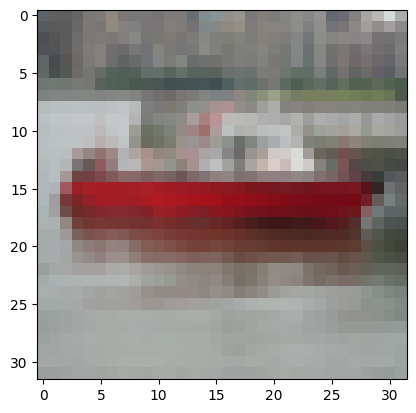

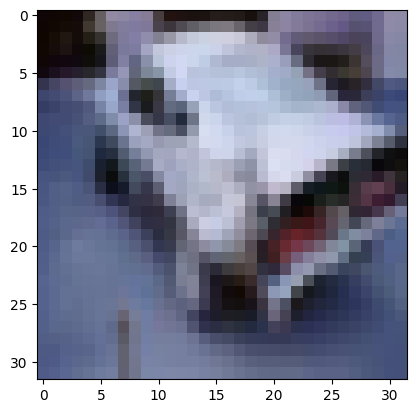

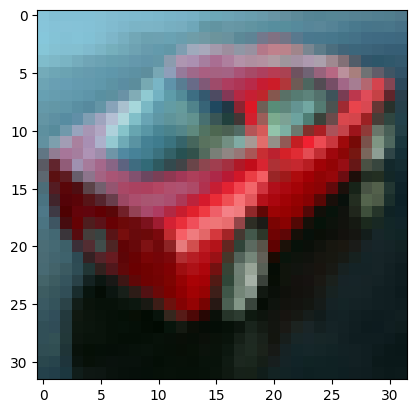

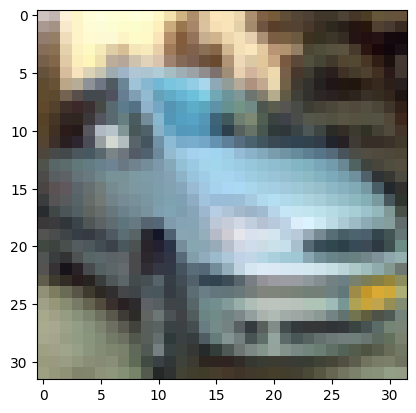

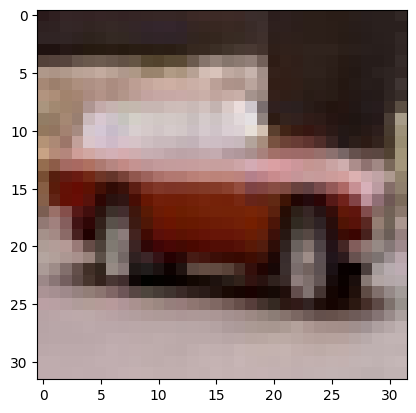

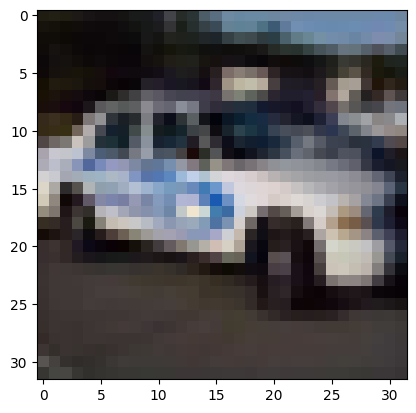

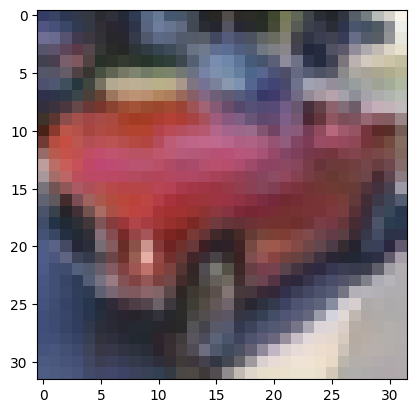

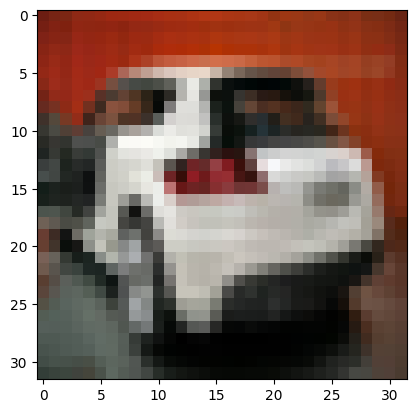

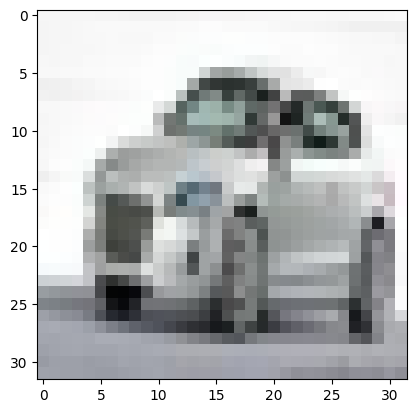

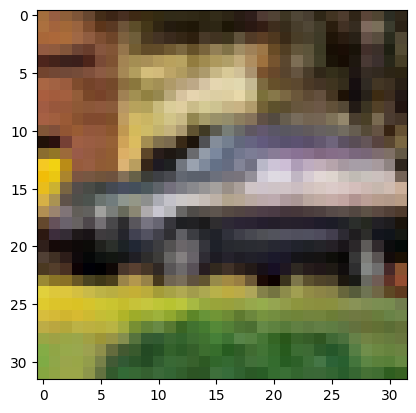

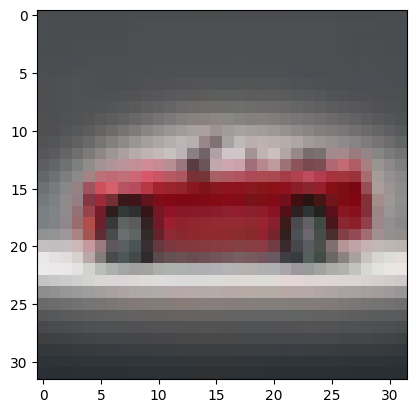

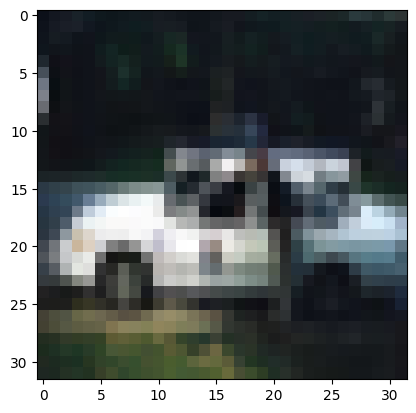

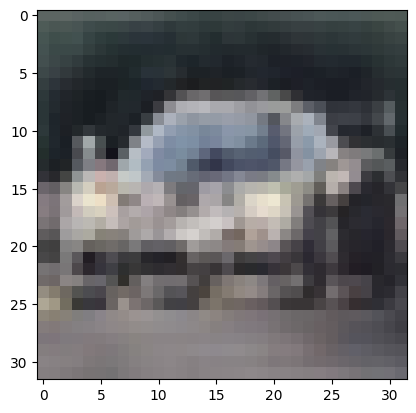

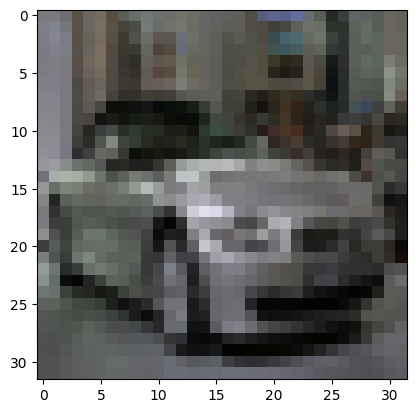

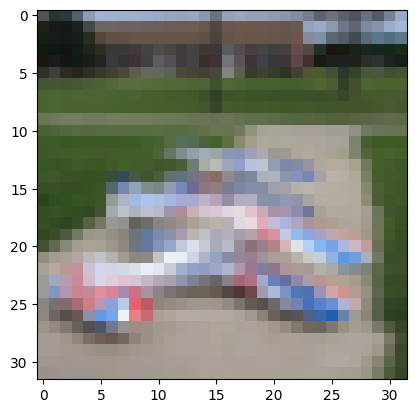

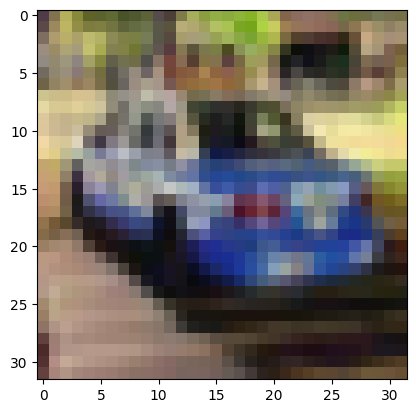

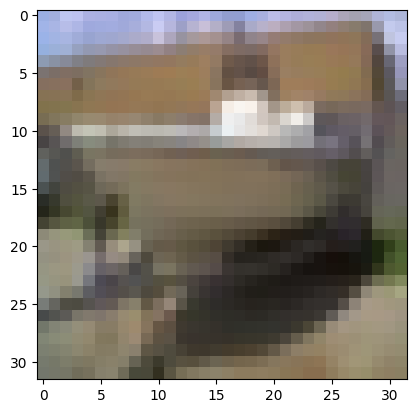

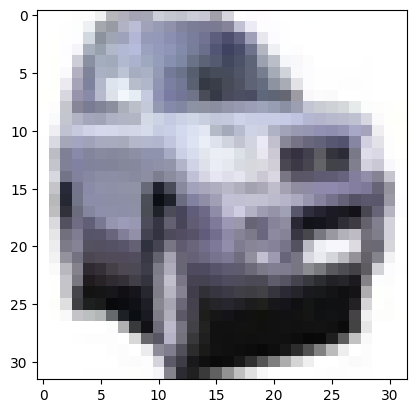

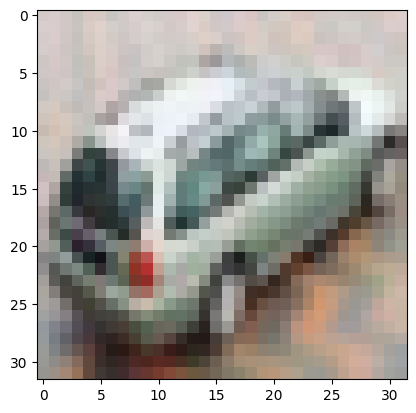

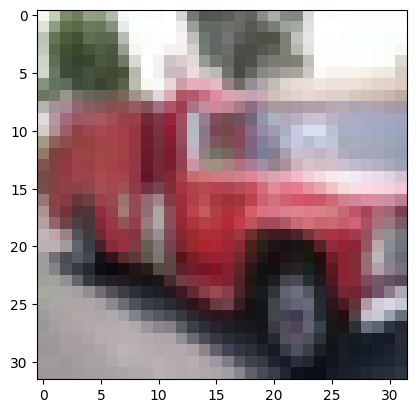

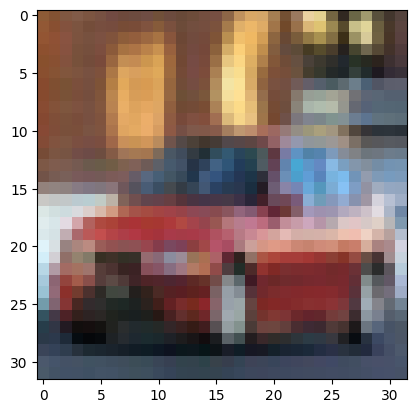

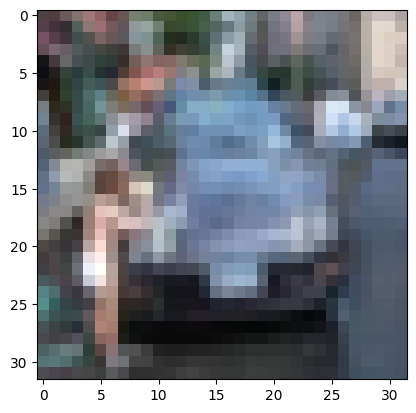

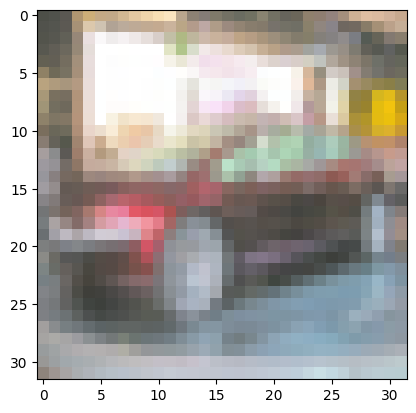

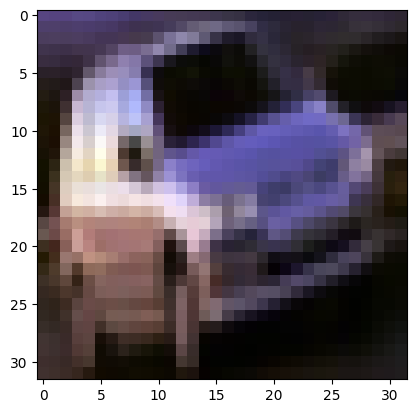

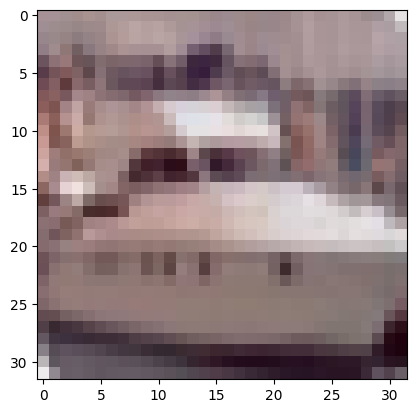

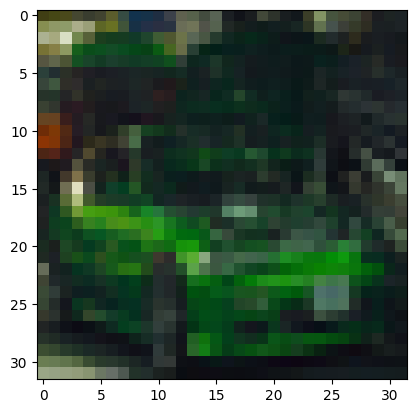

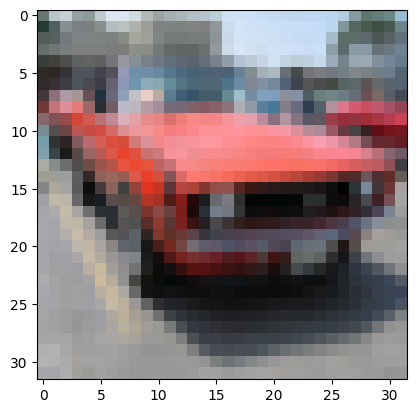

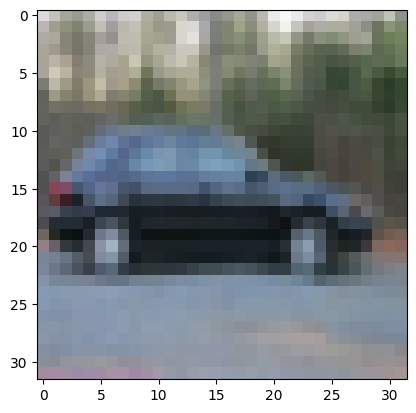

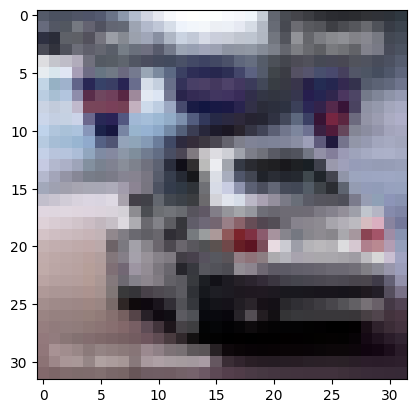

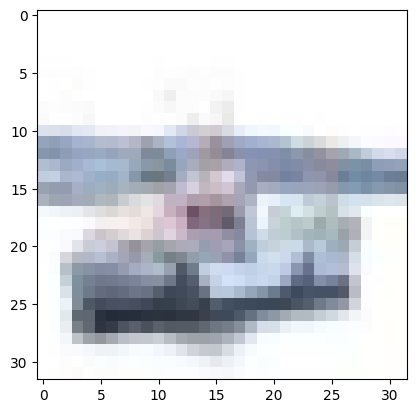

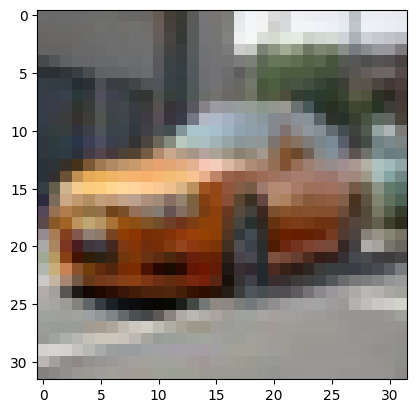

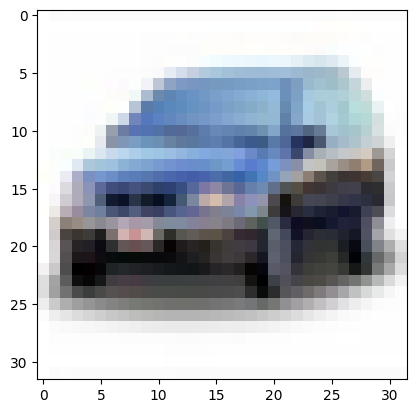

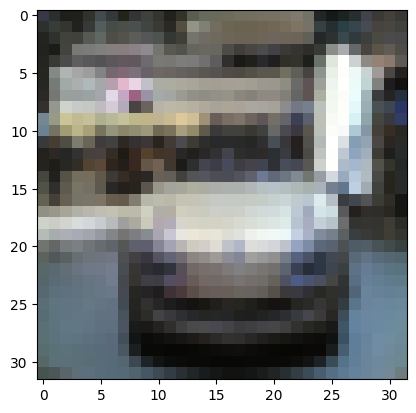

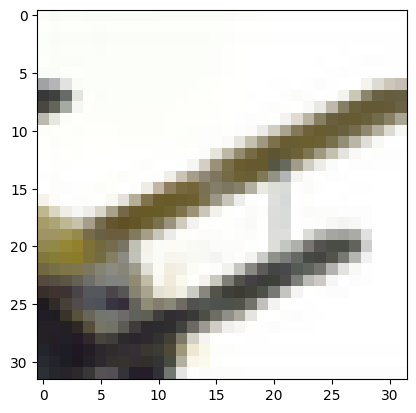

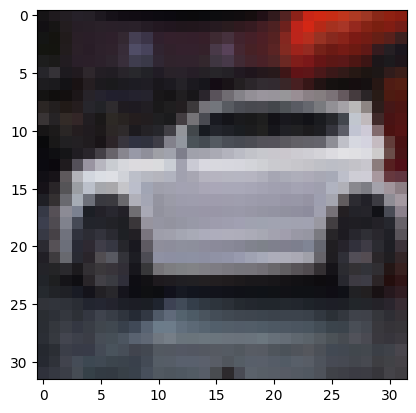

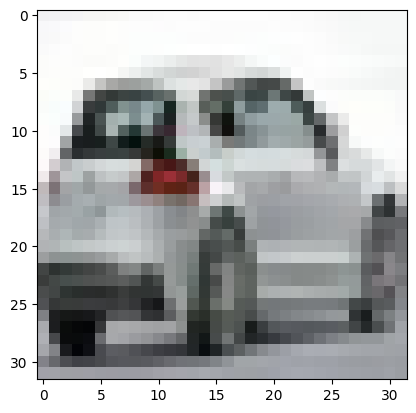

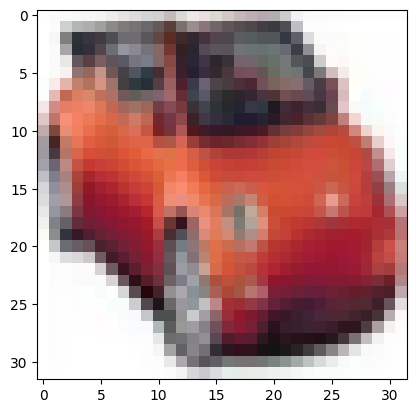

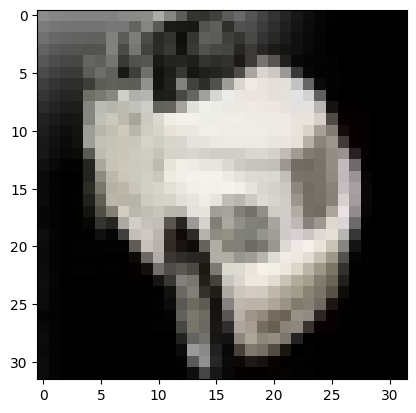

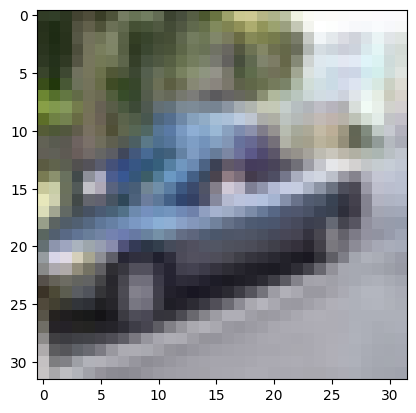

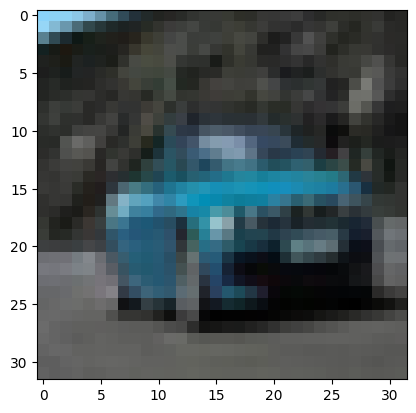

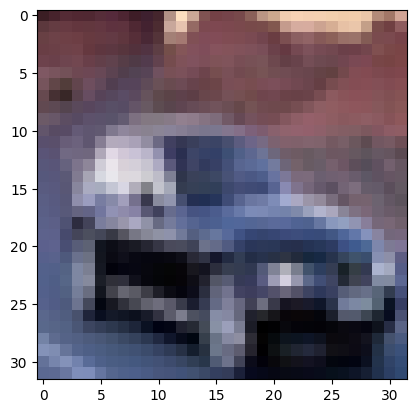

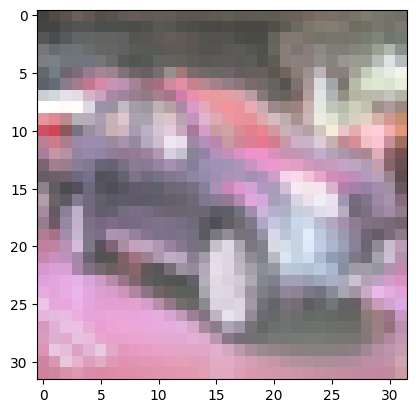

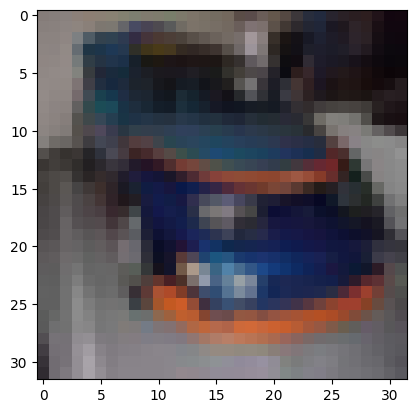

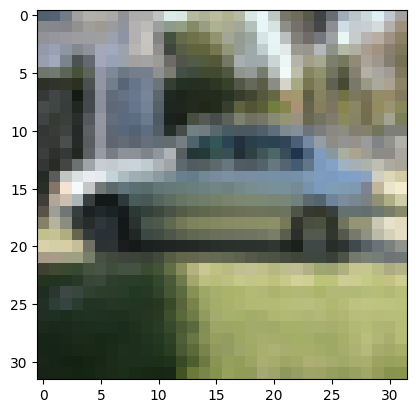

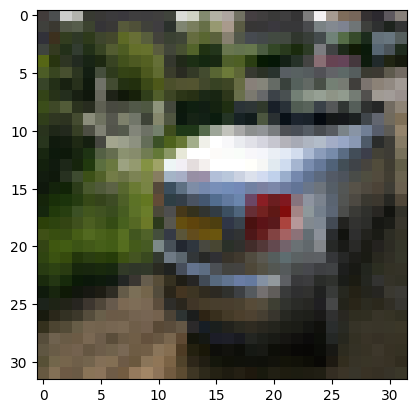

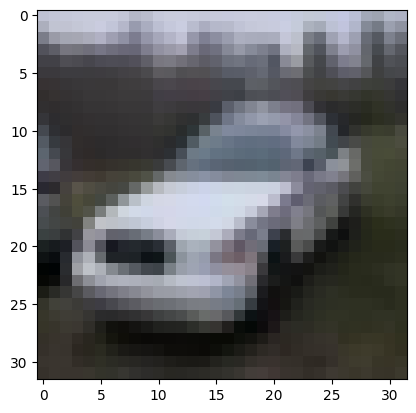

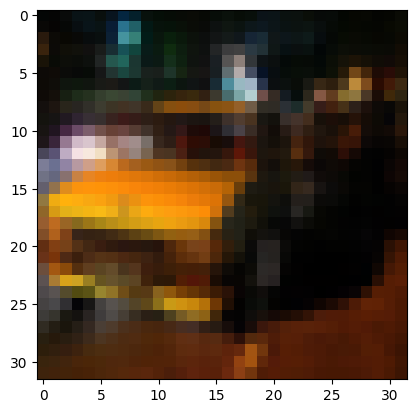

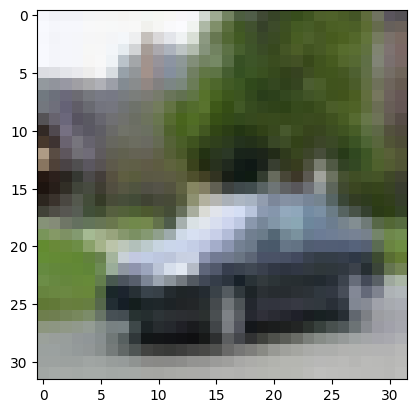

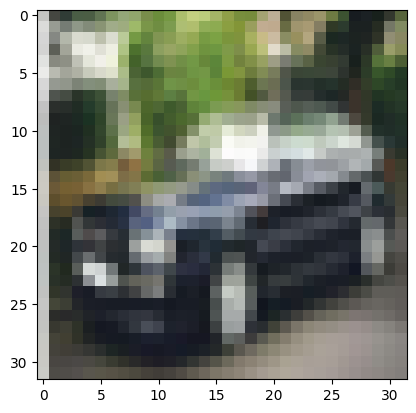

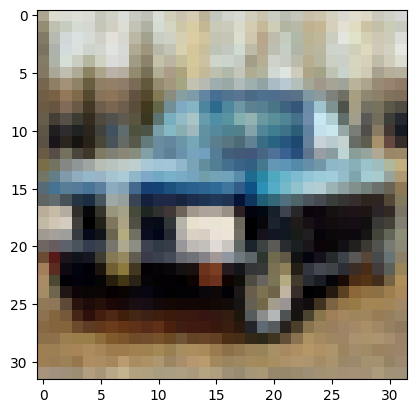

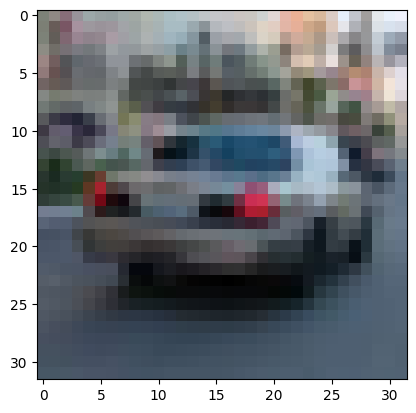

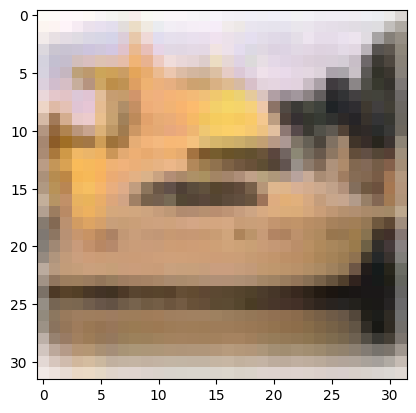

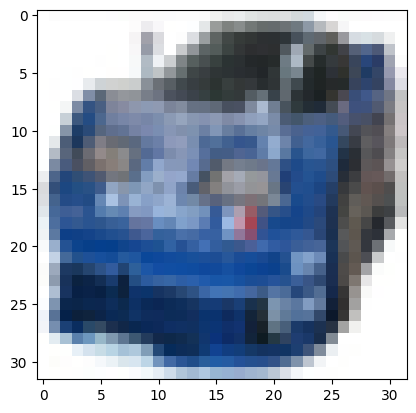

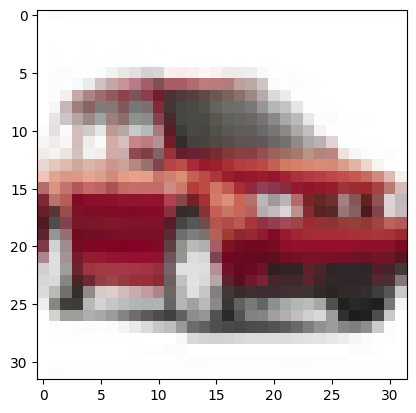

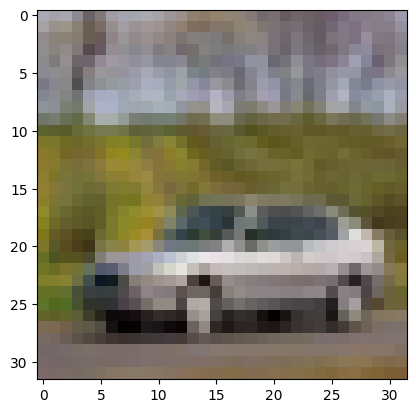

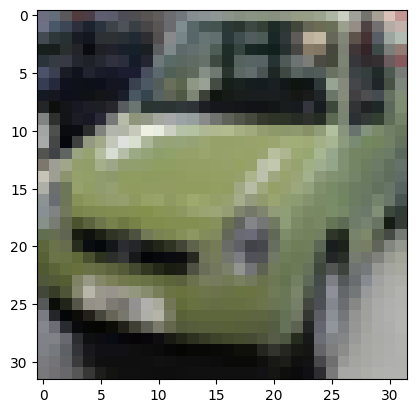

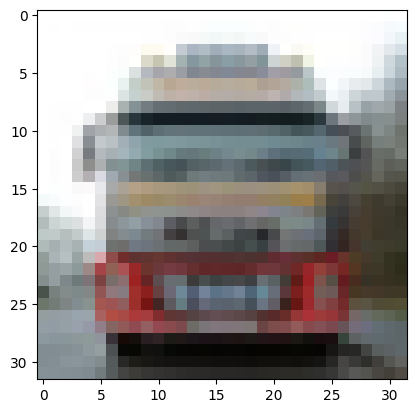

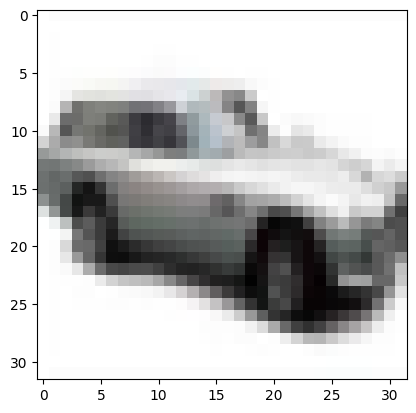

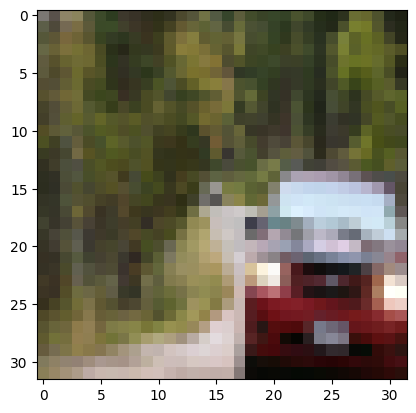

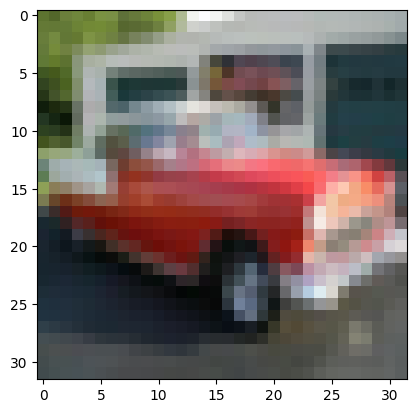

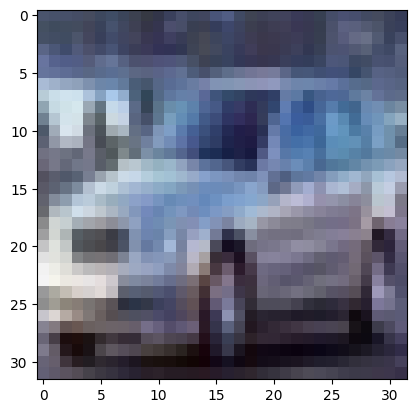

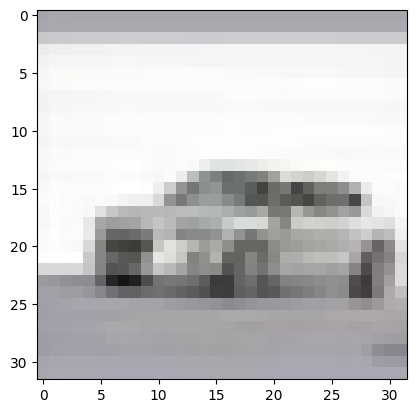

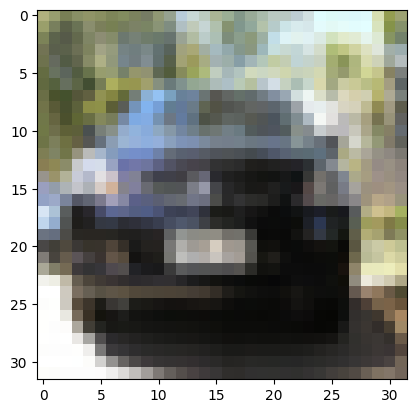

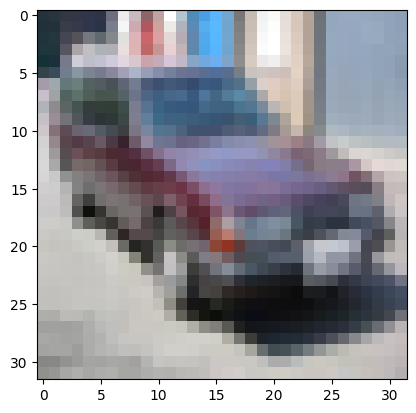

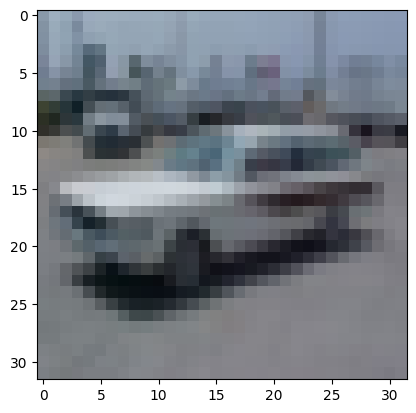

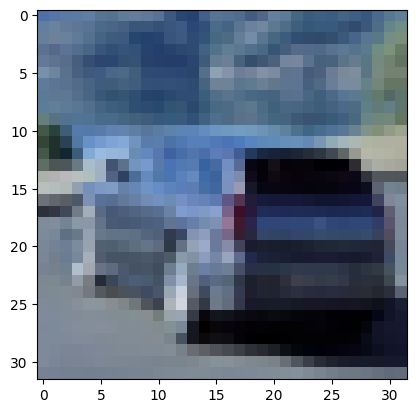

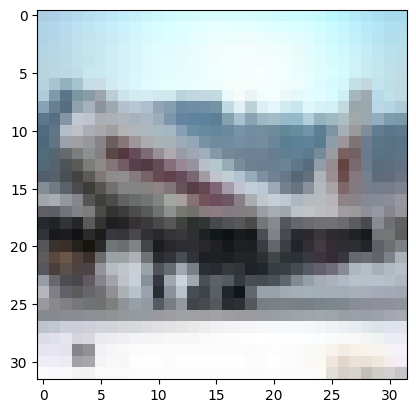

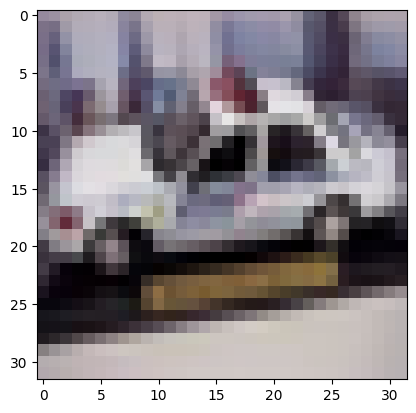

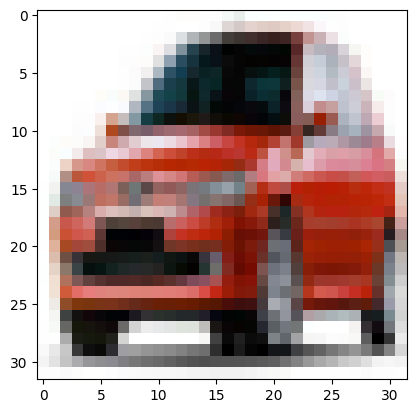

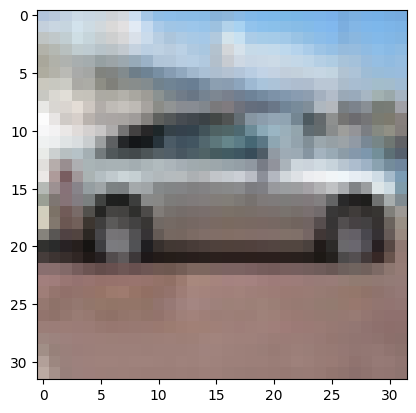

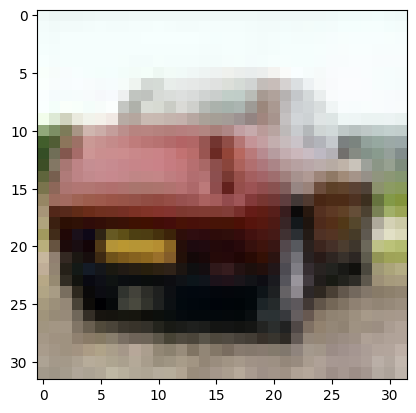

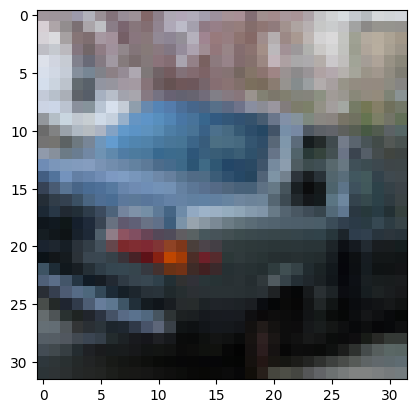

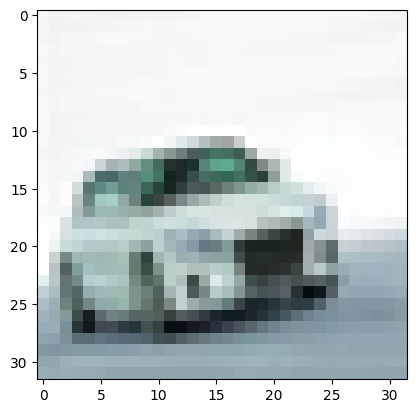

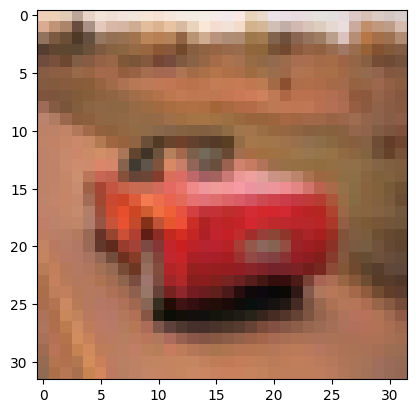

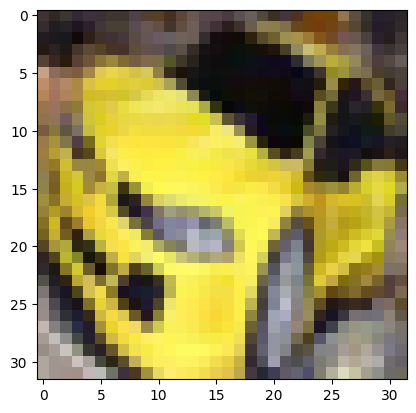

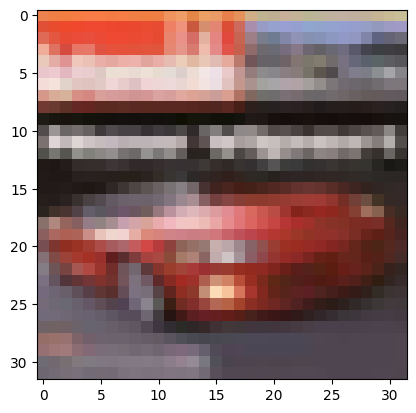

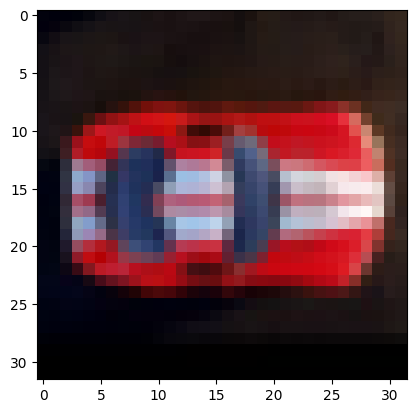

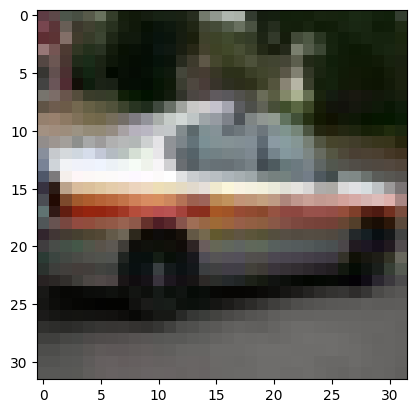

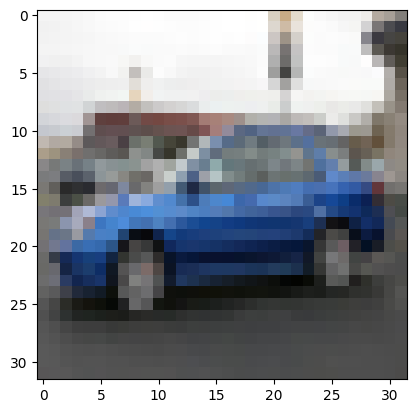

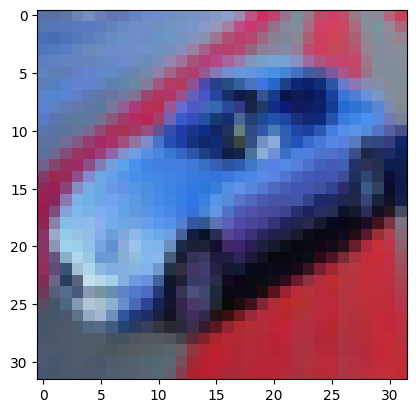

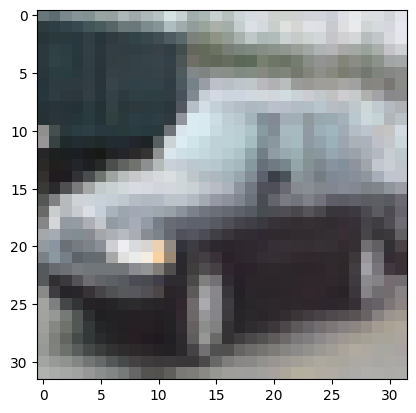

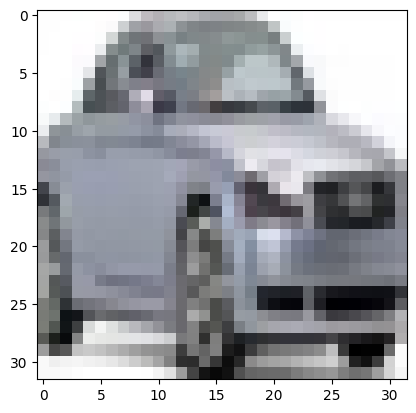

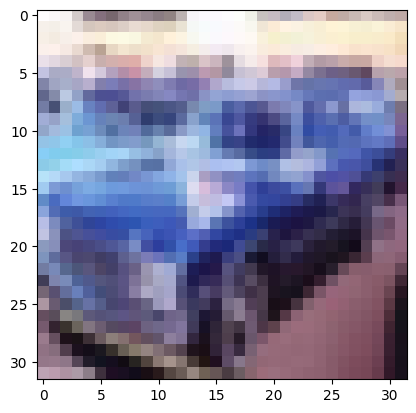

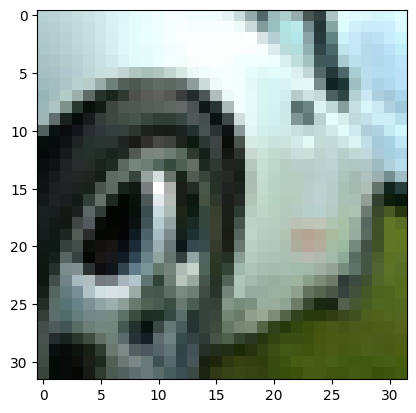

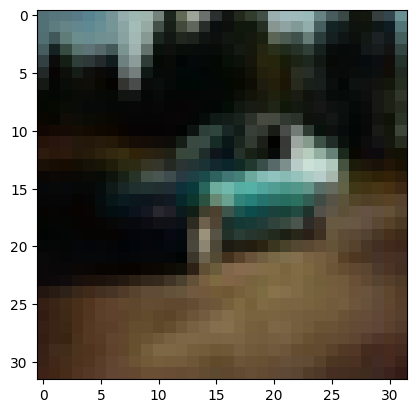

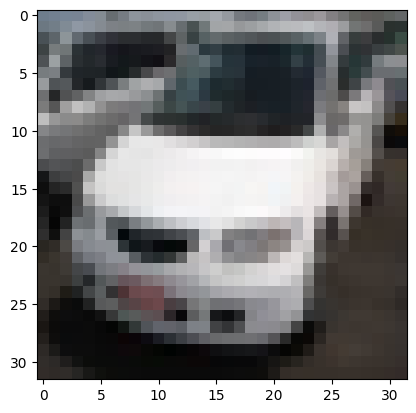

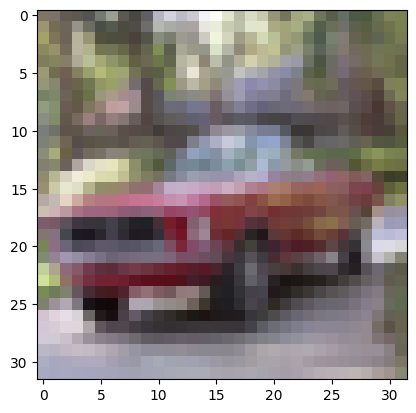

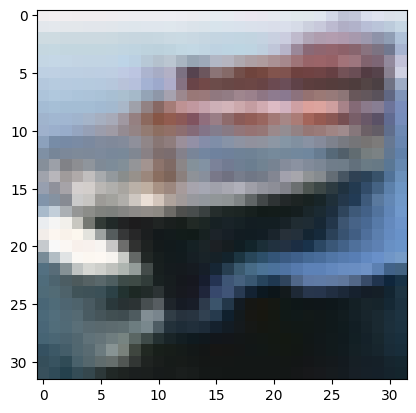

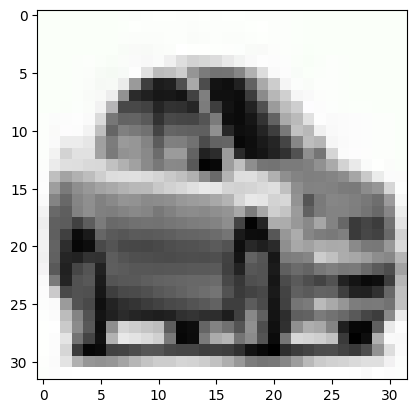

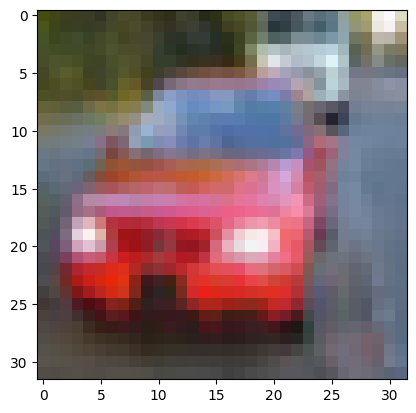

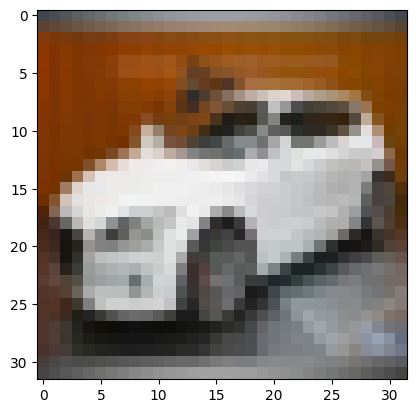

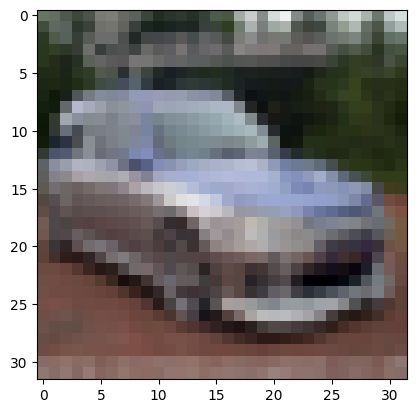

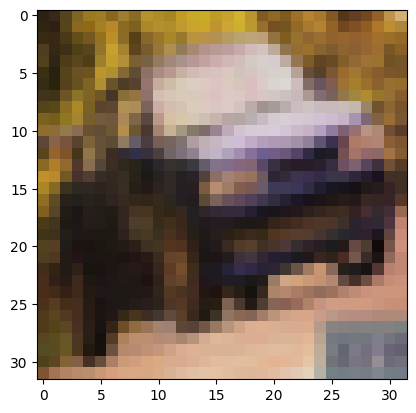

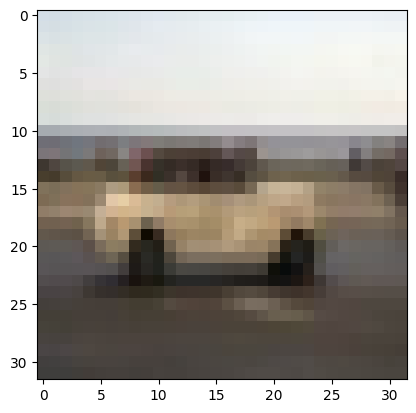

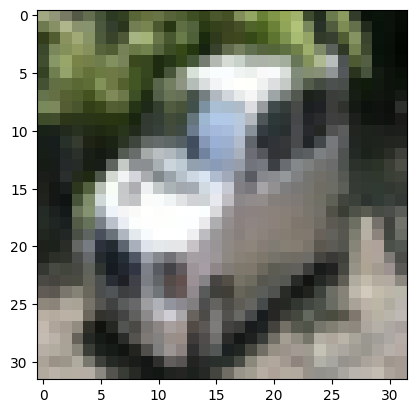

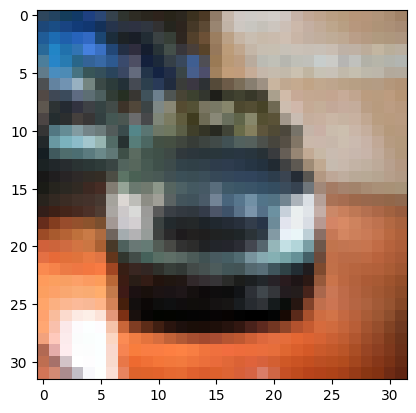

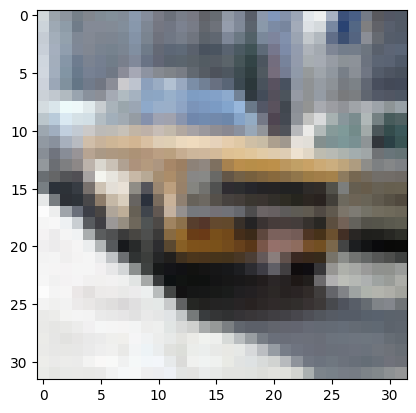

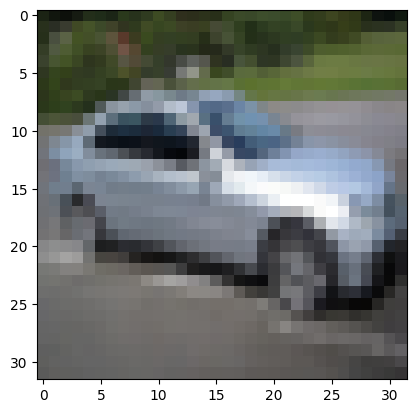

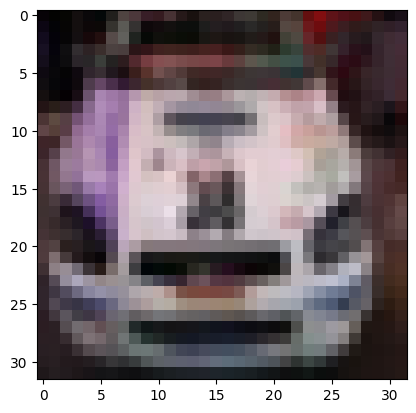

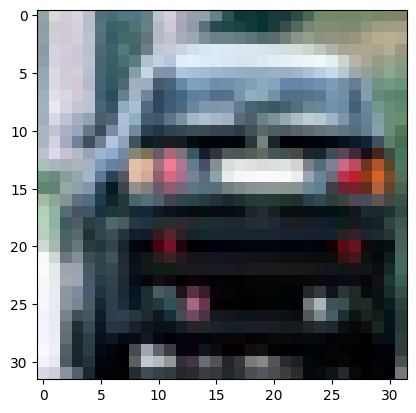

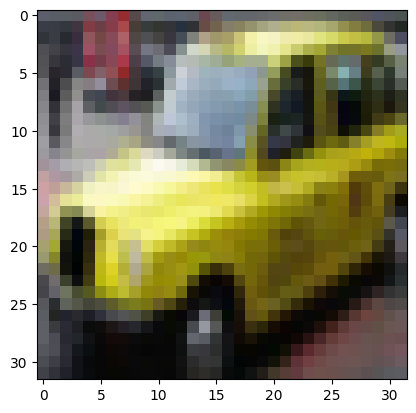

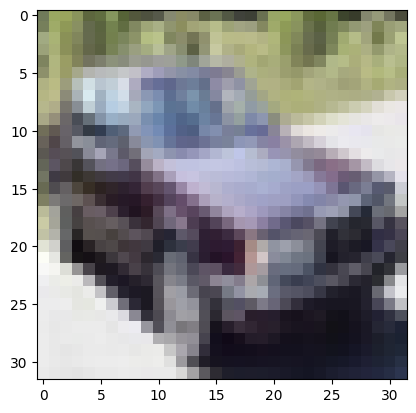

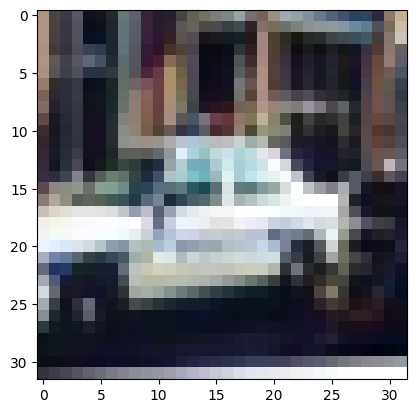

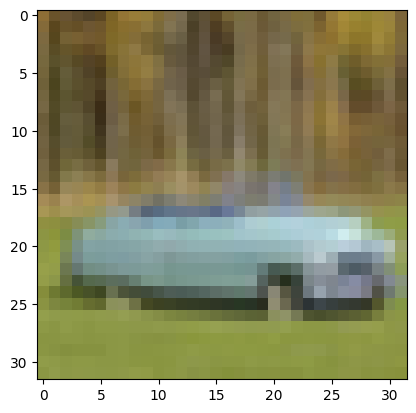

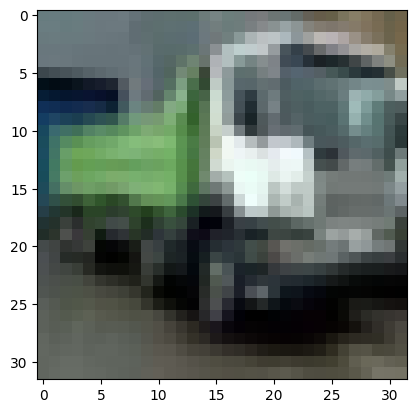

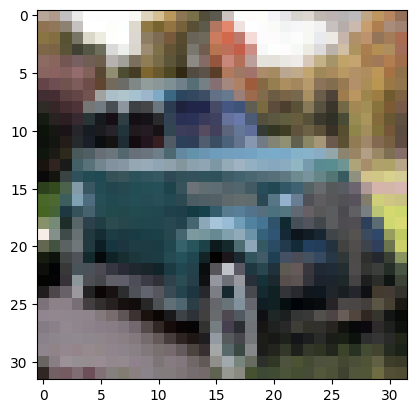

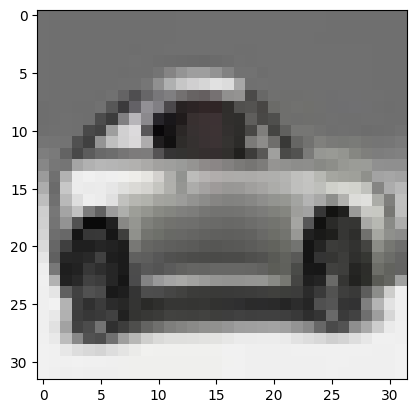

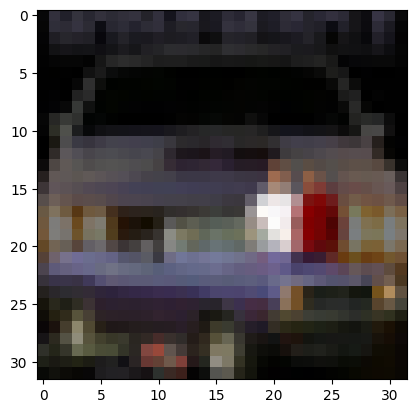

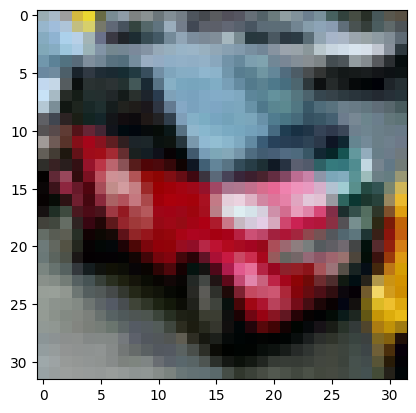

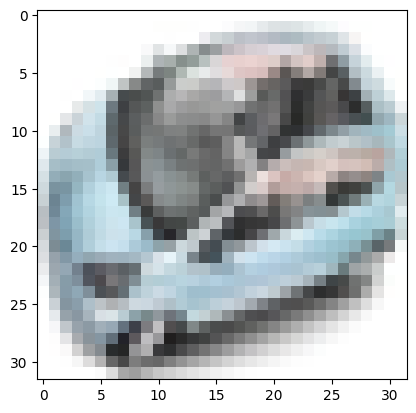

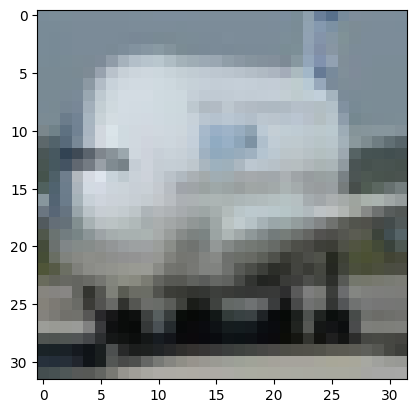

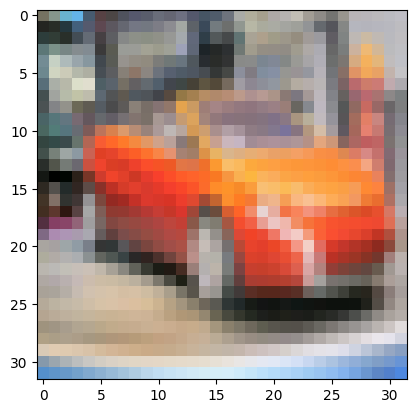

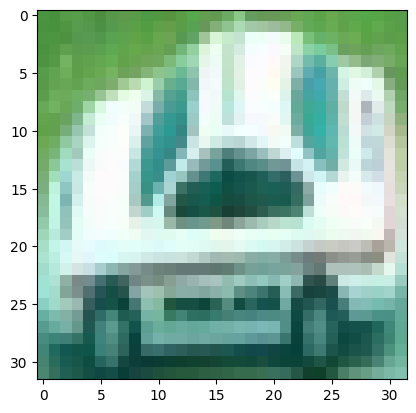

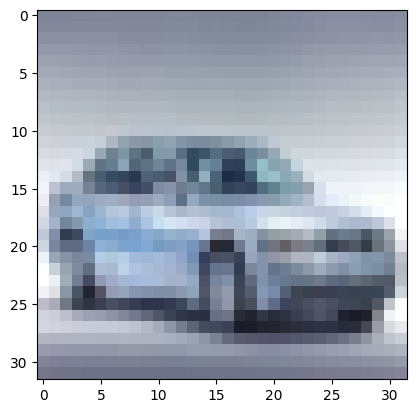

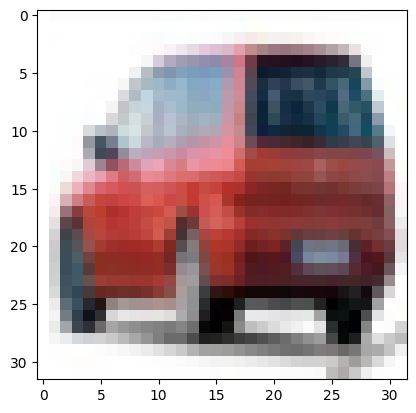

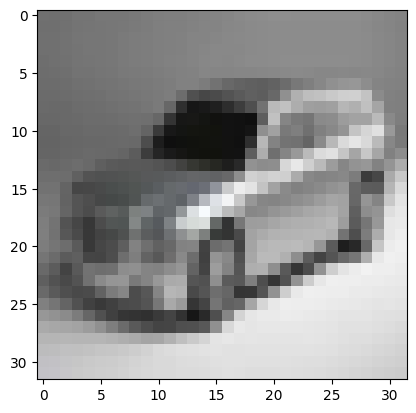

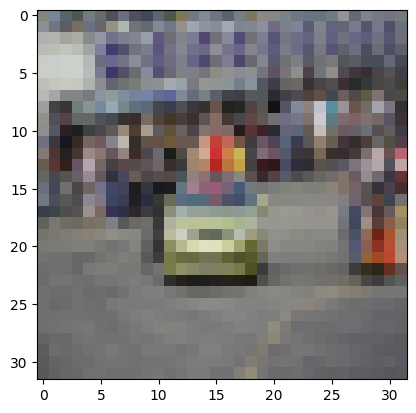

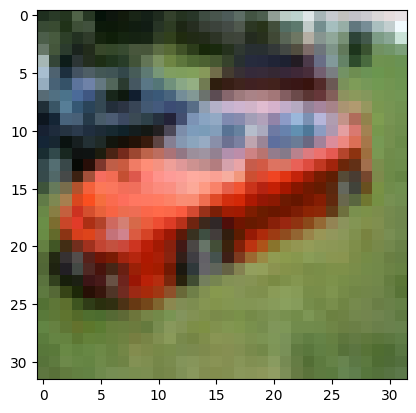

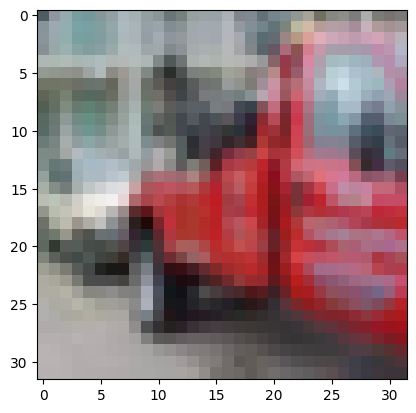

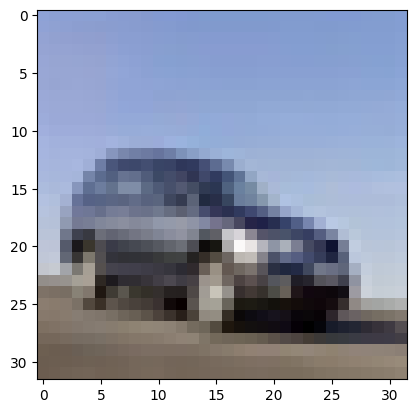

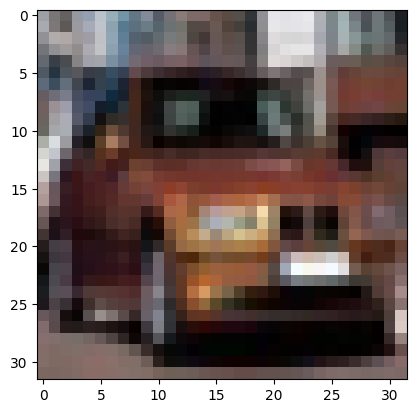

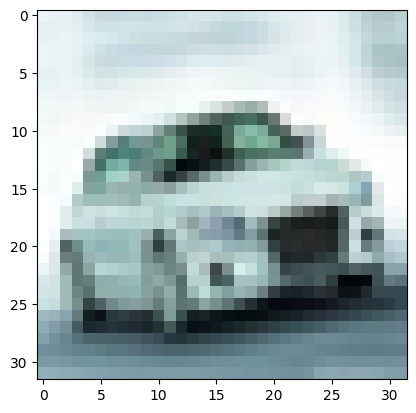

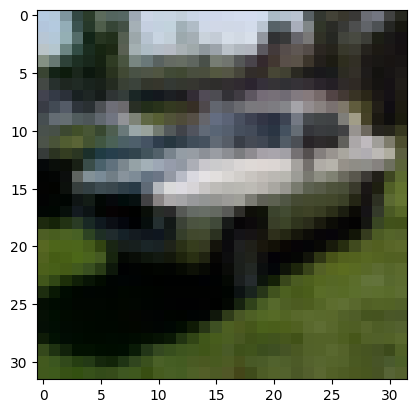

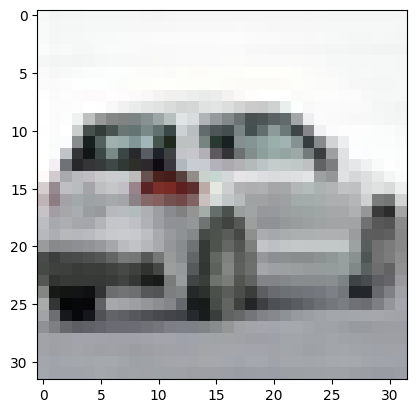

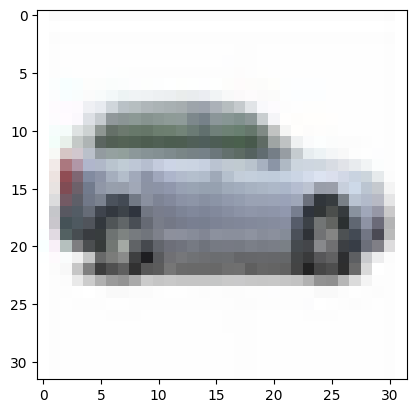

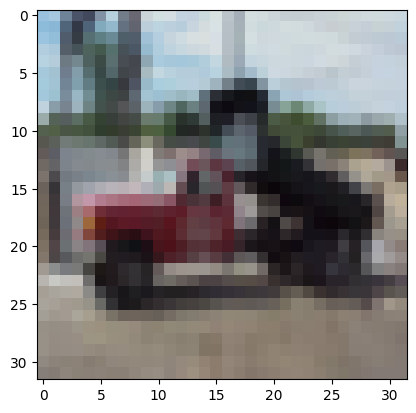

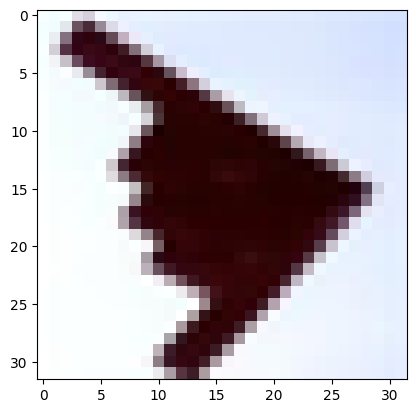

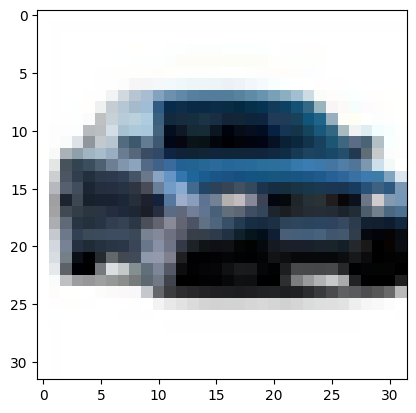

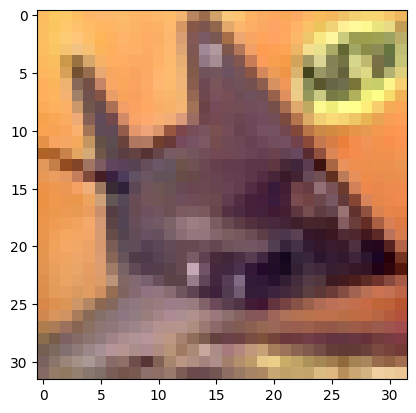

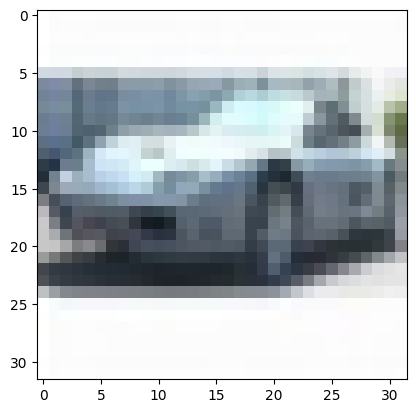

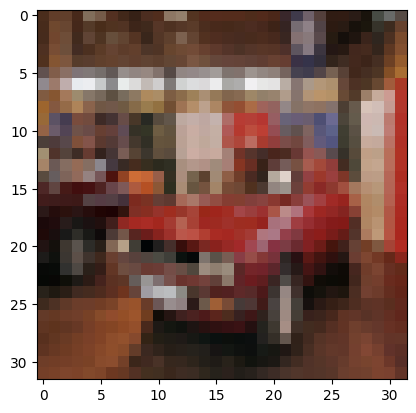

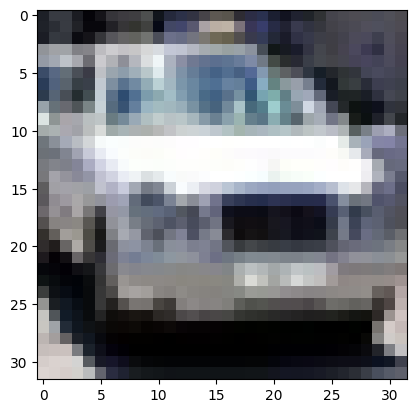

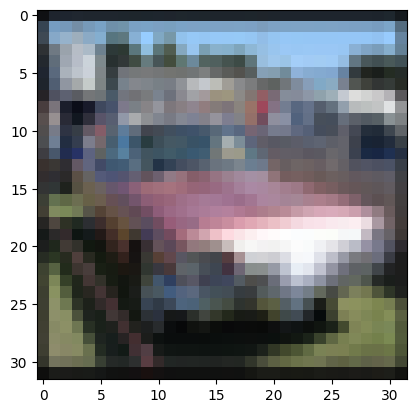

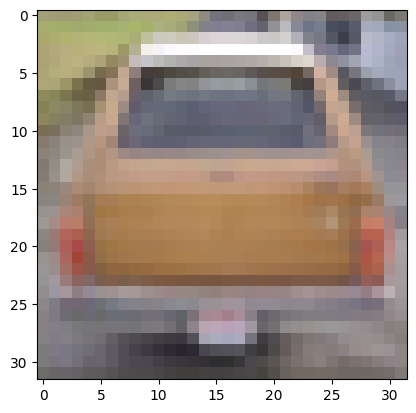

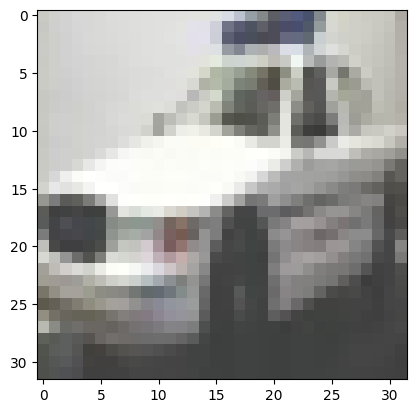

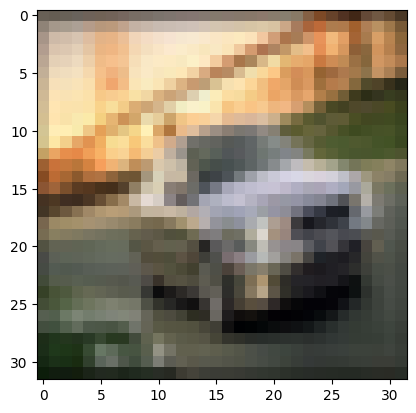

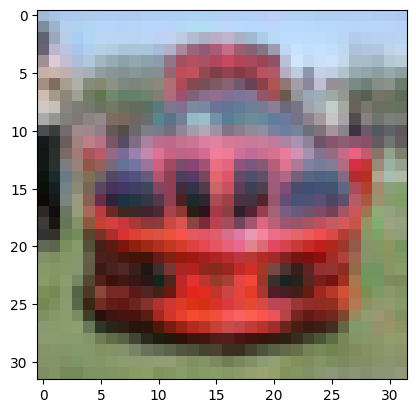

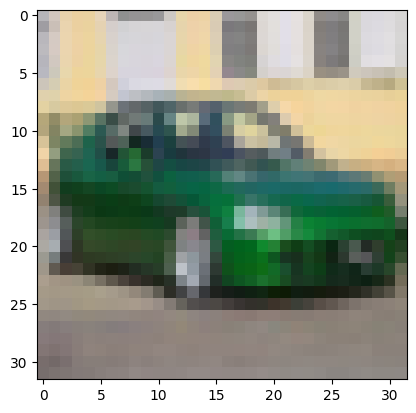

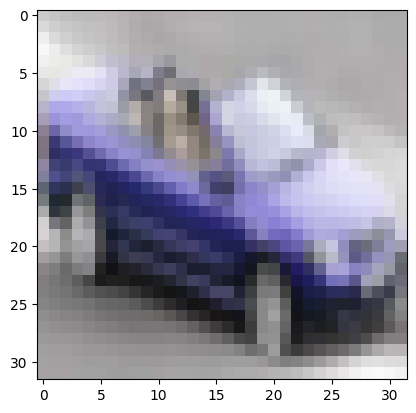

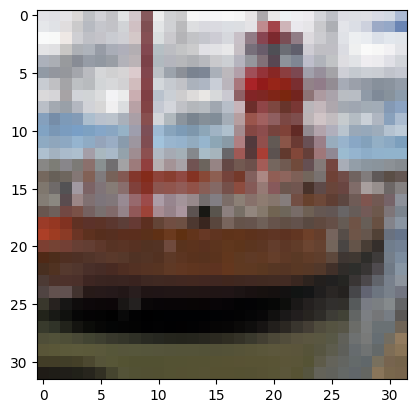

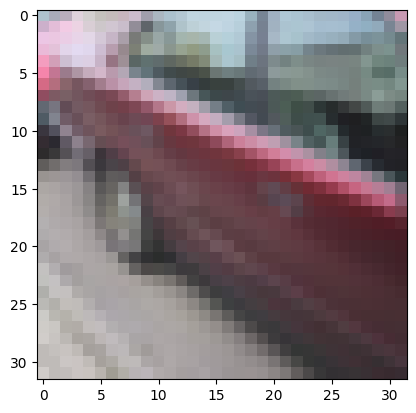

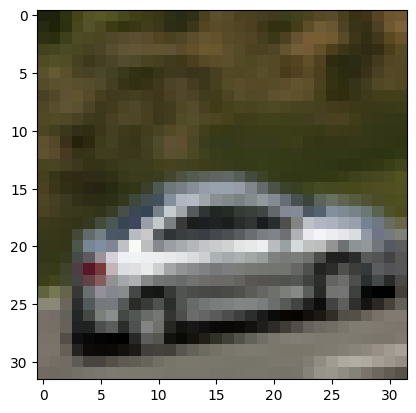

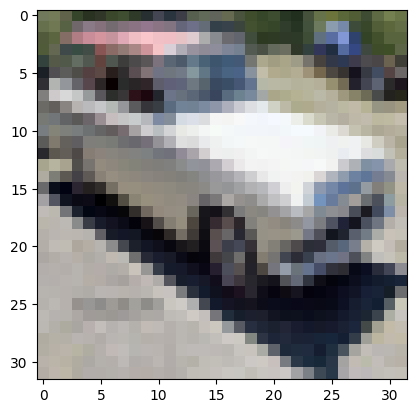

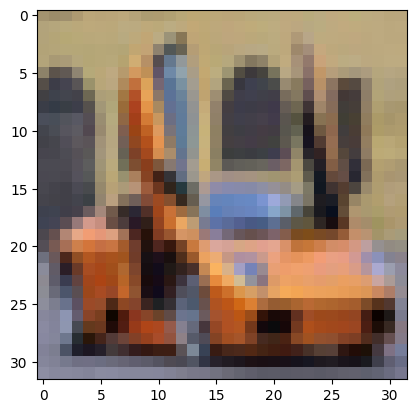

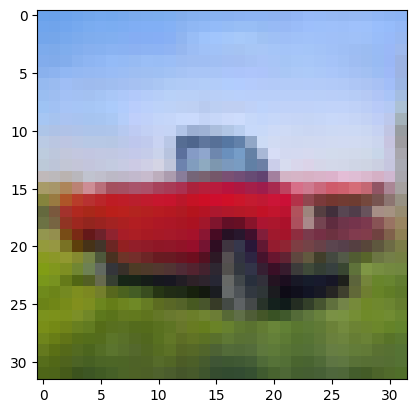

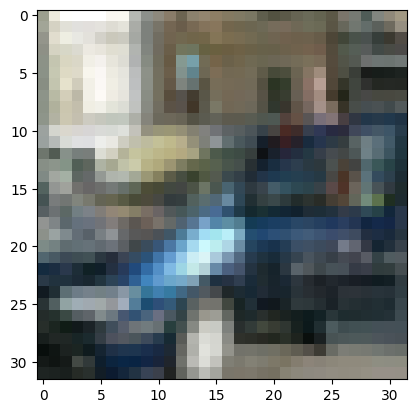

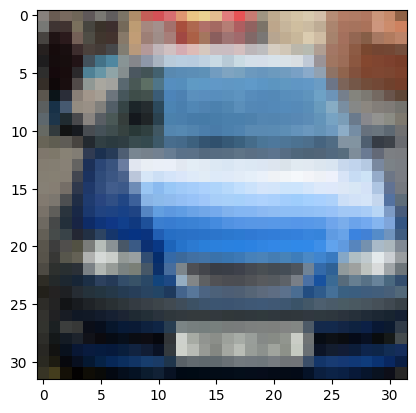

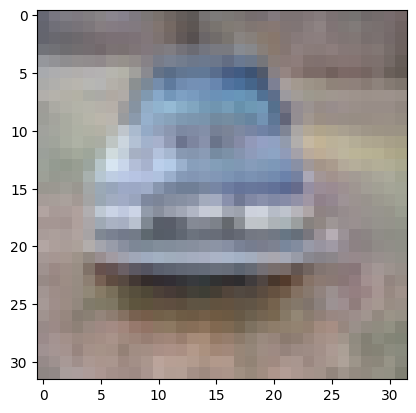

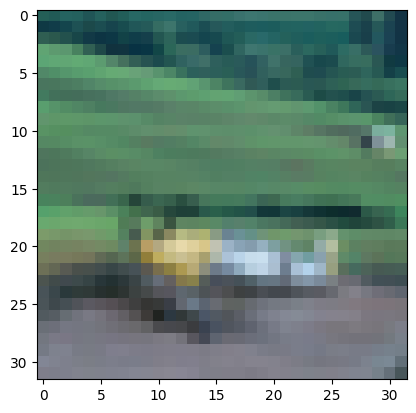

KeyboardInterrupt: 

In [31]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

yourid =np.random.seed(20224531)  # 본인의 ID로 시드를 설정

# 파일 경로를 실제 파일이 있는 위치로 수정
file_path = r"C:\github\Data\final_files\p1data.npy"

# 파일 열기
with open(file_path, 'rb') as infile:
    test_images = np.load(infile)
    test_labels = np.load(infile)  # 이미지에 대한 라벨도 함께 로드

# 데이터를 셔플
test_images, test_labels = shuffle(test_images, test_labels, random_state=yourid)

# 셔플된 데이터를 저장하거나 이후 단계에서 사용
np.save('shuffled_p1data.npy', test_images)
np.save('shuffled_p1labels.npy', test_labels)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 간단한 CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 클래스 수에 맞게 조정
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(test_images, test_labels, epochs=10)

# PUANGs 이미지 예측
predictions = model.predict(test_images)

# PUANGs 이미지의 인덱스 찾기
PUANG_LABEL = 1  # PUANGs 클래스 라벨 (예시)
puang_indices = [i for i, pred in enumerate(predictions) if np.argmax(pred) == PUANG_LABEL]

# PUANGs 이미지와 인덱스 출력
print("PUANGs Indices:", puang_indices)
for idx in puang_indices:
    plt.imshow(test_images[idx])
    plt.show()
